We are attempting to compute the Forward Euler method and calculate errors in convergence of a differential equation.

In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt


def npPrint(a, f={'float_kind': lambda x: "%.5e" % x}): # defining common functions from quiz
    print(np.array2string(a, formatter=f))


def forwardEuler(f, Df, t0, y0, h): 
    return y0 + h * f(t0, y0)


def Q11(f, Df, t0, y0, h):
    callf = f(t0, y0)  # reduce number of times f is called by calling it once here instead of twice below
    y1 = y0 + (h / 2) * (callf + f(t0 + h, y0 + h * callf))
    return y1


def evolve(phi, f, Df, t0, y0, T, N):
    h = T / N
    n = np.arange(0, N + 1, 1)
    t = h * n
    y = np.zeros((N + 1, len(y0)))
    y[0] = y0
    for n in range(N):
        y[n + 1] = phi(f, Df, t[n], y[n], h)
    return t, y


def computeEocs(herr):
    eocs = np.zeros(0)
    h = herr[:, 0]
    e = herr[:, 1]
    i = 0
    while i < np.size(herr, 0) - 1:
        eocs = np.append(eocs, np.log(e[i + 1] / e[i]) / np.log(h[i + 1] / h[i]))
        i += 1
    return eocs

Firstly, we have some basic functions to compute foward Euler and errors of convergence. We also define our Q11 method of finding results.

In [2]:
def errorComputation(function, Y, f, T, y0):
    maxError = np.zeros((10, 2)) # create array of vectors to hold maximum erros
    N0 = 25 # set number of steps
    for i in range(10): # loop to allow 10 values to be added to the error array
        error = []
        N = N0 * (2 ** i)  
        h = T / N  # calculate h using N above
        t, y = evolve(function, f, 0, 0, y0, T, N)  # use parameter function with evolve method
        for n in range(np.shape(y)[0]):  # appends each error calculated
            newError = np.linalg.norm(y[n] - Y(t[n]))
            error.append(newError)
        error = np.array(error) 
        maxError[i, :] = [h, np.max(error)]  # inserts max of errors calculated into array
    print("The maximum errors for each h are:")
    print("   h         | Error")
    npPrint(maxError)
    print("\nThe EOCs are")
    npPrint(computeEocs(maxError))  # computes EOCs and prints them
    return maxError

Next, I created a general function for computing and printing the maximum errors and EOCs of those errors - I realised I could save a lot of space by using this function multiple later sections since they all want similar processes. The only differences between these later sections is the function, Y, f, interval T and initial y0 - so these are all parameters of this function. Doing this significantly reduces repetition in code.

In [3]:
def errorComp12(function):  # general function for 2.1 and 2.2 to prevent repetition
    lamd = 1
    comp = errorComputation(function, lambda t: np.array(
        [2 * np.exp(t) / (2 * np.exp(t) - 1), -2 * np.exp(t) / (4 * np.exp(2 * t) - 4 * np.exp(t) + 1)]),
                     lambda t, y: np.array([y[1], y[1] * (lamd - 2 * y[0])]), 10, np.array([2, -2]))
    return comp

Next I created a general function for to compute errors since the only difference there is the function used; Y, f, T and y0 are all matching, so rather than repeating them, I nested the errorComputation function with them. Let's compute some results:

In [4]:
forwardComp = errorComp12(forwardEuler)  # compute errors for forward euler

The maximum errors for each h are:
   h         | Error
[[4.00000e-01 1.19752e+00]
 [2.00000e-01 3.84901e-01]
 [1.00000e-01 1.42446e-01]
 [5.00000e-02 6.52550e-02]
 [2.50000e-02 3.13566e-02]
 [1.25000e-02 1.53835e-02]
 [6.25000e-03 7.62053e-03]
 [3.12500e-03 3.79268e-03]
 [1.56250e-03 1.89197e-03]
 [7.81250e-04 9.44899e-04]]

The EOCs are
[1.63749e+00 1.43407e+00 1.12626e+00 1.05732e+00 1.02738e+00 1.01342e+00
 1.00668e+00 1.00333e+00 1.00166e+00]


So our errors are decreasing as our h increases. Linear convergence is showcased by our EOCs converging to 1.

In [5]:
q11Comp = errorComp12(Q11)  # compute errors for Q11 method

The maximum errors for each h are:
   h         | Error
[[4.00000e-01 2.33601e-01]
 [2.00000e-01 5.72438e-02]
 [1.00000e-01 1.25299e-02]
 [5.00000e-02 2.89433e-03]
 [2.50000e-02 6.88980e-04]
 [1.25000e-02 1.68007e-04]
 [6.25000e-03 4.14827e-05]
 [3.12500e-03 1.03058e-05]
 [1.56250e-03 2.56836e-06]
 [7.81250e-04 6.41080e-07]]

The EOCs are
[2.02886e+00 2.19174e+00 2.11408e+00 2.07069e+00 2.03594e+00 2.01794e+00
 2.00906e+00 2.00454e+00 2.00227e+00]


Unlike the previous part, quadratic convergence is implied as our EOCs converge to 2.

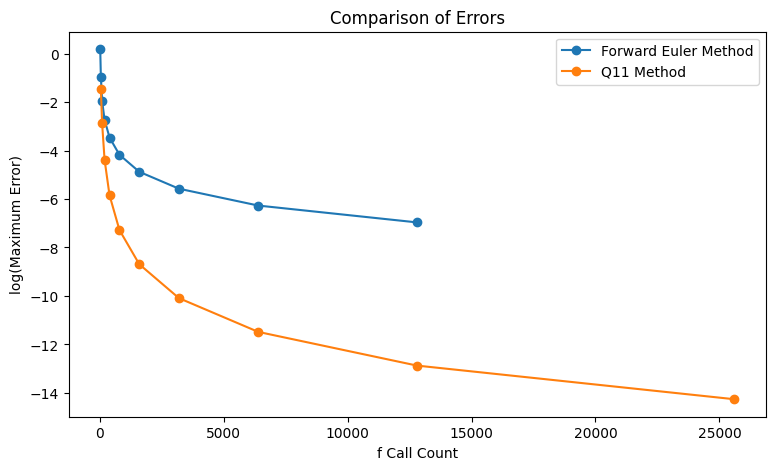

In [6]:
def plotting(forwardComp, q11Comp): # function to plot comparison graph (will reduce repetition)
    for i in range(10):
        forwardComp[i,0] = 10 / forwardComp[i,0]  # change h to N for plotting
        q11Comp[i,0] = 2 * 10 / q11Comp[i,0]
    plt.figure(figsize=(9, 5))
    plt.title('Comparison of Errors')
    plt.xlabel("f Call Count")
    plt.ylabel("log(Maximum Error)")

    plt.plot(forwardComp[:,0],np.log(forwardComp[:,1]),marker='o', label= "Forward Euler Method")  
    plt.plot(q11Comp[:,0],np.log(q11Comp[:,1]),marker='o', label="Q11 Method")  # plot each method on same figure
    plt.legend()
    plt.show()
    
plotting(forwardComp, q11Comp)

The forwarEuler method calls the function once, whereas Q11 calls the function twice at the most optimised state. Since the implementation of the errorComputation procedure is the same for both functions, the only difference in process time is from the amount of times f is called. I found this lead to a small but noticeable increase in processing time when running the program from my PC for the Q11 function compared to the forwardEuler function.

However, this increase in processing time results in a faster rate of convergence (2 for Q11 compared to 1 for forwardEuler) and consistently smaller errors for each step. If we look at the error at each 2n step for the forwardEuler method, the respective error at each n step of the Q11 method is smaller, implying that, despite calling the function double the amount of times, we receive a smaller error slightly MORE THAN twice as fast as the forwardEuler method. 

This is reflected in the graph above, which shows that at matching call counts, Q11 method has smaller maximum errors.

This leads me to believe that for this f and Y, the Q11 method is more efficient for precise computations.

Firstly, I am going to create functions for Y and f so I can refer to them effectively in the program, then I'll compute the errors.

In [7]:
def Y4(t):  # define Y function for easy access
    if t < (np.pi / 2):
        return np.sin(t)
    else:
        return np.exp(t - (np.pi / 2))


def f4(t, y):  # similarly define f function
    if t < (np.pi / 2):
        return np.cos(t)
    else:
        return y

print("Forward Euler Method")
forwardCompQ4 = errorComputation(forwardEuler, Y4, f4, 3, np.array([0]))  
print("\nQ11 Method")  # compute both methods with new functions and arguments
q11CompQ4 = errorComputation(Q11, Y4, f4, 3, np.array([0]))

Forward Euler Method
The maximum errors for each h are:
   h         | Error
[[1.20000e-01 4.90234e-01]
 [6.00000e-02 2.41162e-01]
 [3.00000e-02 1.03184e-01]
 [1.50000e-02 3.04089e-02]
 [7.50000e-03 2.40459e-02]
 [3.75000e-03 5.22880e-03]
 [1.87500e-03 3.56577e-03]
 [9.37500e-04 2.73107e-03]
 [4.68750e-04 2.31293e-03]
 [2.34375e-04 1.12533e-03]]

The EOCs are
[1.02347e+00 1.22478e+00 1.76266e+00 3.38699e-01 2.20124e+00 5.52268e-01
 3.84744e-01 2.39746e-01 1.03937e+00]

Q11 Method
The maximum errors for each h are:
   h         | Error
[[1.20000e-01 2.21094e-01]
 [6.00000e-02 8.45661e-02]
 [3.00000e-02 1.87087e-02]
 [1.50000e-02 1.34666e-02]
 [7.50000e-03 1.96899e-03]
 [3.75000e-03 5.91576e-03]
 [1.87500e-03 2.01545e-03]
 [9.37500e-04 6.17727e-05]
 [4.68750e-04 9.15947e-04]
 [2.34375e-04 4.26424e-04]]

The EOCs are
[1.38651e+00 2.17637e+00 4.74330e-01 2.77385e+00 -1.58711e+00 1.55346e+00
 5.02799e+00 -3.89022e+00 1.10297e+00]


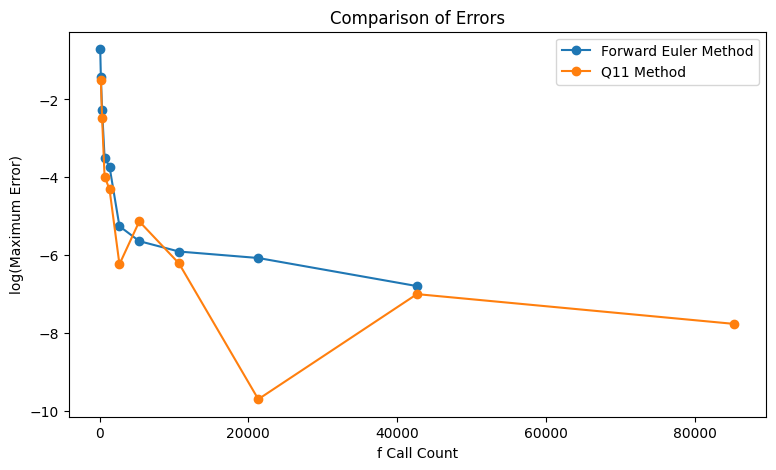

In [8]:
plotting(forwardCompQ4,q11CompQ4)

Unlike before, the errors vs count of f calls is problematic. After 6400 calls of the Q11 method, the maximum error starts to increase, and while it is lower than the Forward Euler method in that interval, the increase at 800 to 1600 f calls actually makes Q11 less efficient than the forward Euler method.

The EOCs are also not converging for the Q11 method, unlike those we saw in the earlier parts of the simulation. This could be due to the functions not being $C^3$ or smooth which was assumed when proving rate of convergence. When I defined Y and f for this, the function was component-wise defined and this split causes the curve to not be smooth, leading to our functions not being $C^1$ and definitely not $C^3$. These errors are likely a result of this lack of smoothness.

The forward Euler method also requires $C^2$ but has had less problems than the Q11 method. While the errors are decreasing as the f calls are increasing, the EOCs are not converging, implying that it is likely to result in issues in higher f calls (the maximum error may increase). So neither method is ideal for non-continuously differentiable functions. 

Personally, I find the Q11 method too unpredictable for efficient use, due to the function not being smooth, so the forward Euler method seems preferable - so far it has been monotone meaning no increases in error at all. However, this is not an ideal situation for either method.